# Case study on unsupervised learning
Try out different clustering models in the given dataset. Find the optimum number of clusters in each model and create the model with optimum number of clusters. Also learn about dB scan clustering and implement it

In [1]:
# import relevant libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
df = pd.read_csv('Wine_clust.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Exploratory Data Analysis 

df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
#No missing values... cleaned data available

In [13]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [14]:
# checking duplicates

df.duplicated().sum()

0

In [15]:
df.shape

(178, 13)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    float64
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [17]:
### Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df.loc[:,:] = sc.fit_transform(df)


In [18]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,4.366046e-17,5.987720e-17,5.613487e-17,-1.135172e-16,-1.715232e-17,-3.074944e-16,-2.494883e-17,1.085274e-16,1.715232e-17,-1.122697e-17,1.072800e-16,-5.488743e-17,1.790079e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


# KMeans Clustering

C:\Users\shoum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


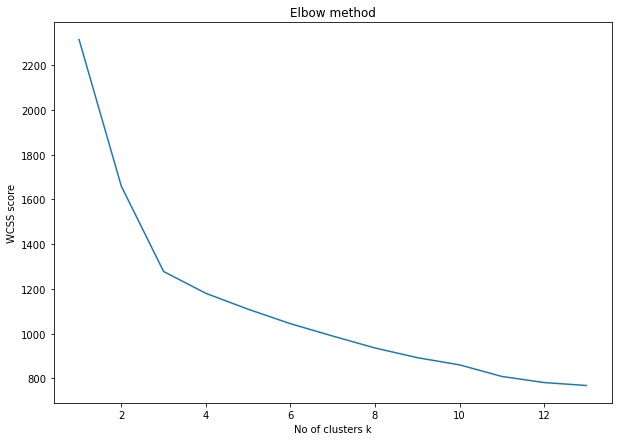

In [19]:
# taking all features for clustering

#elbow method ===> Finding optimal value of k 

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,14):
  km=KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=101)
  km.fit(df)
  wcss.append(km.inertia_)


# plot wcss vs k
plt.figure(figsize=(10,7))
plt.plot(range(1,14),wcss)
plt.title("Elbow method")
plt.xlabel("No of clusters k")
plt.ylabel("WCSS score")
plt.show()


In [20]:
## from graph, elbow found at k = 3. 
## Hence lets build model with optimal value of k = 3


In [21]:
# KMeans Clustering with k = 3

km=KMeans(n_clusters=3,init="k-means++",n_init=10,random_state=101)
y_kmeans = km.fit_predict(df)


In [22]:
# Silhouette score

from sklearn.metrics import silhouette_score
sil_avg = silhouette_score(df, y_kmeans)
sil_avg

0.2848589191898987

In [23]:
#Visualization of clusters
from sklearn.manifold import TSNE
embedded1 = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(df)

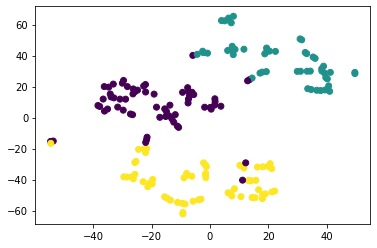

In [24]:
plt.scatter(x=embedded1[:,0],y=embedded1[:,1],c=km.labels_)
plt.show()

# km.labels_ and y_kmeans both are same

# Agglomerative Hierarchical Clustering

In [25]:
import scipy.cluster.hierarchy as sch

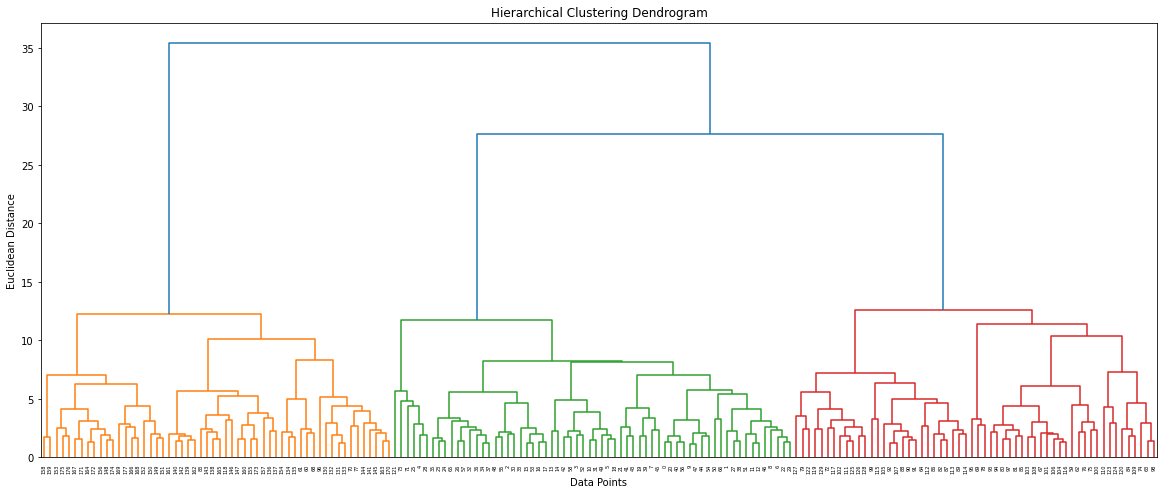

In [26]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [27]:
#From dendrogram its clearly visible that the largest vertical line, that is not being cut by any horzintal line, intersects at 3 points. 
#Hence the optimal number of clusters is 3

In [28]:
## Agglomerative HC model
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df)


In [29]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [30]:
#data points are clustered into 3 diff clusters

In [31]:
# Silhouette score

from sklearn.metrics import silhouette_score
sil_avg = silhouette_score(df, y_hc)
sil_avg

0.2774439826952266

In [32]:
#Visualization of clusters
from sklearn.manifold import TSNE
embedded_hc = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(df)

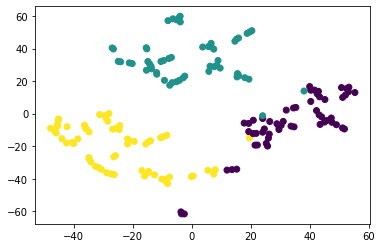

In [33]:
plt.scatter(x=embedded_hc[:,0],y=embedded_hc[:,1],c=y_hc)
plt.show()

# DBSCAN

In [34]:

### In layman’s terms, we find a suitable value for epsilon by calculating the distance to the nearest n points for each point,
### sorting and plotting the results. Then we look to see where the change is most pronounced and select that as epsilon.


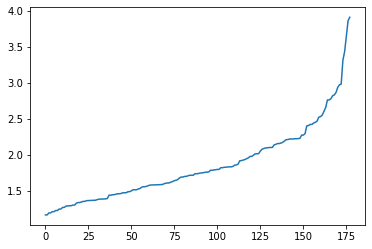

In [35]:
#K-nearest neighbor graph to find optimal eps value

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

## we sort and plot results
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [36]:
### The optimal value for epsilon will be found at the point of maximum curvature

#We train our model, selecting 2.5 for eps and setting min_samples to 15.
# min_samples >= no of columns + 1


In [37]:
#### DBSCAN Clustering

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2.5, min_samples=15).fit(df)
model = db.fit(df)

#The labels_ property contains the list of clusters and their respective points.
clusters = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 51


In [38]:
# Silhouette score

sil_avg = silhouette_score(df, clusters)
sil_avg

0.15400466757498008

In [39]:
#Visualization of clusters
from sklearn.manifold import TSNE
embedded_db = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(df)

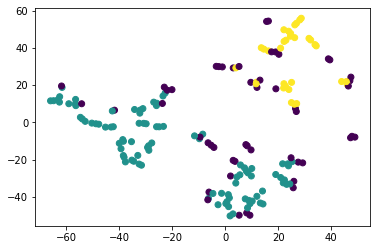

In [40]:
plt.scatter(x=embedded_db[:,0],y=embedded_db[:,1],c=clusters)
plt.show()

# Principal Component Analysis

In [41]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


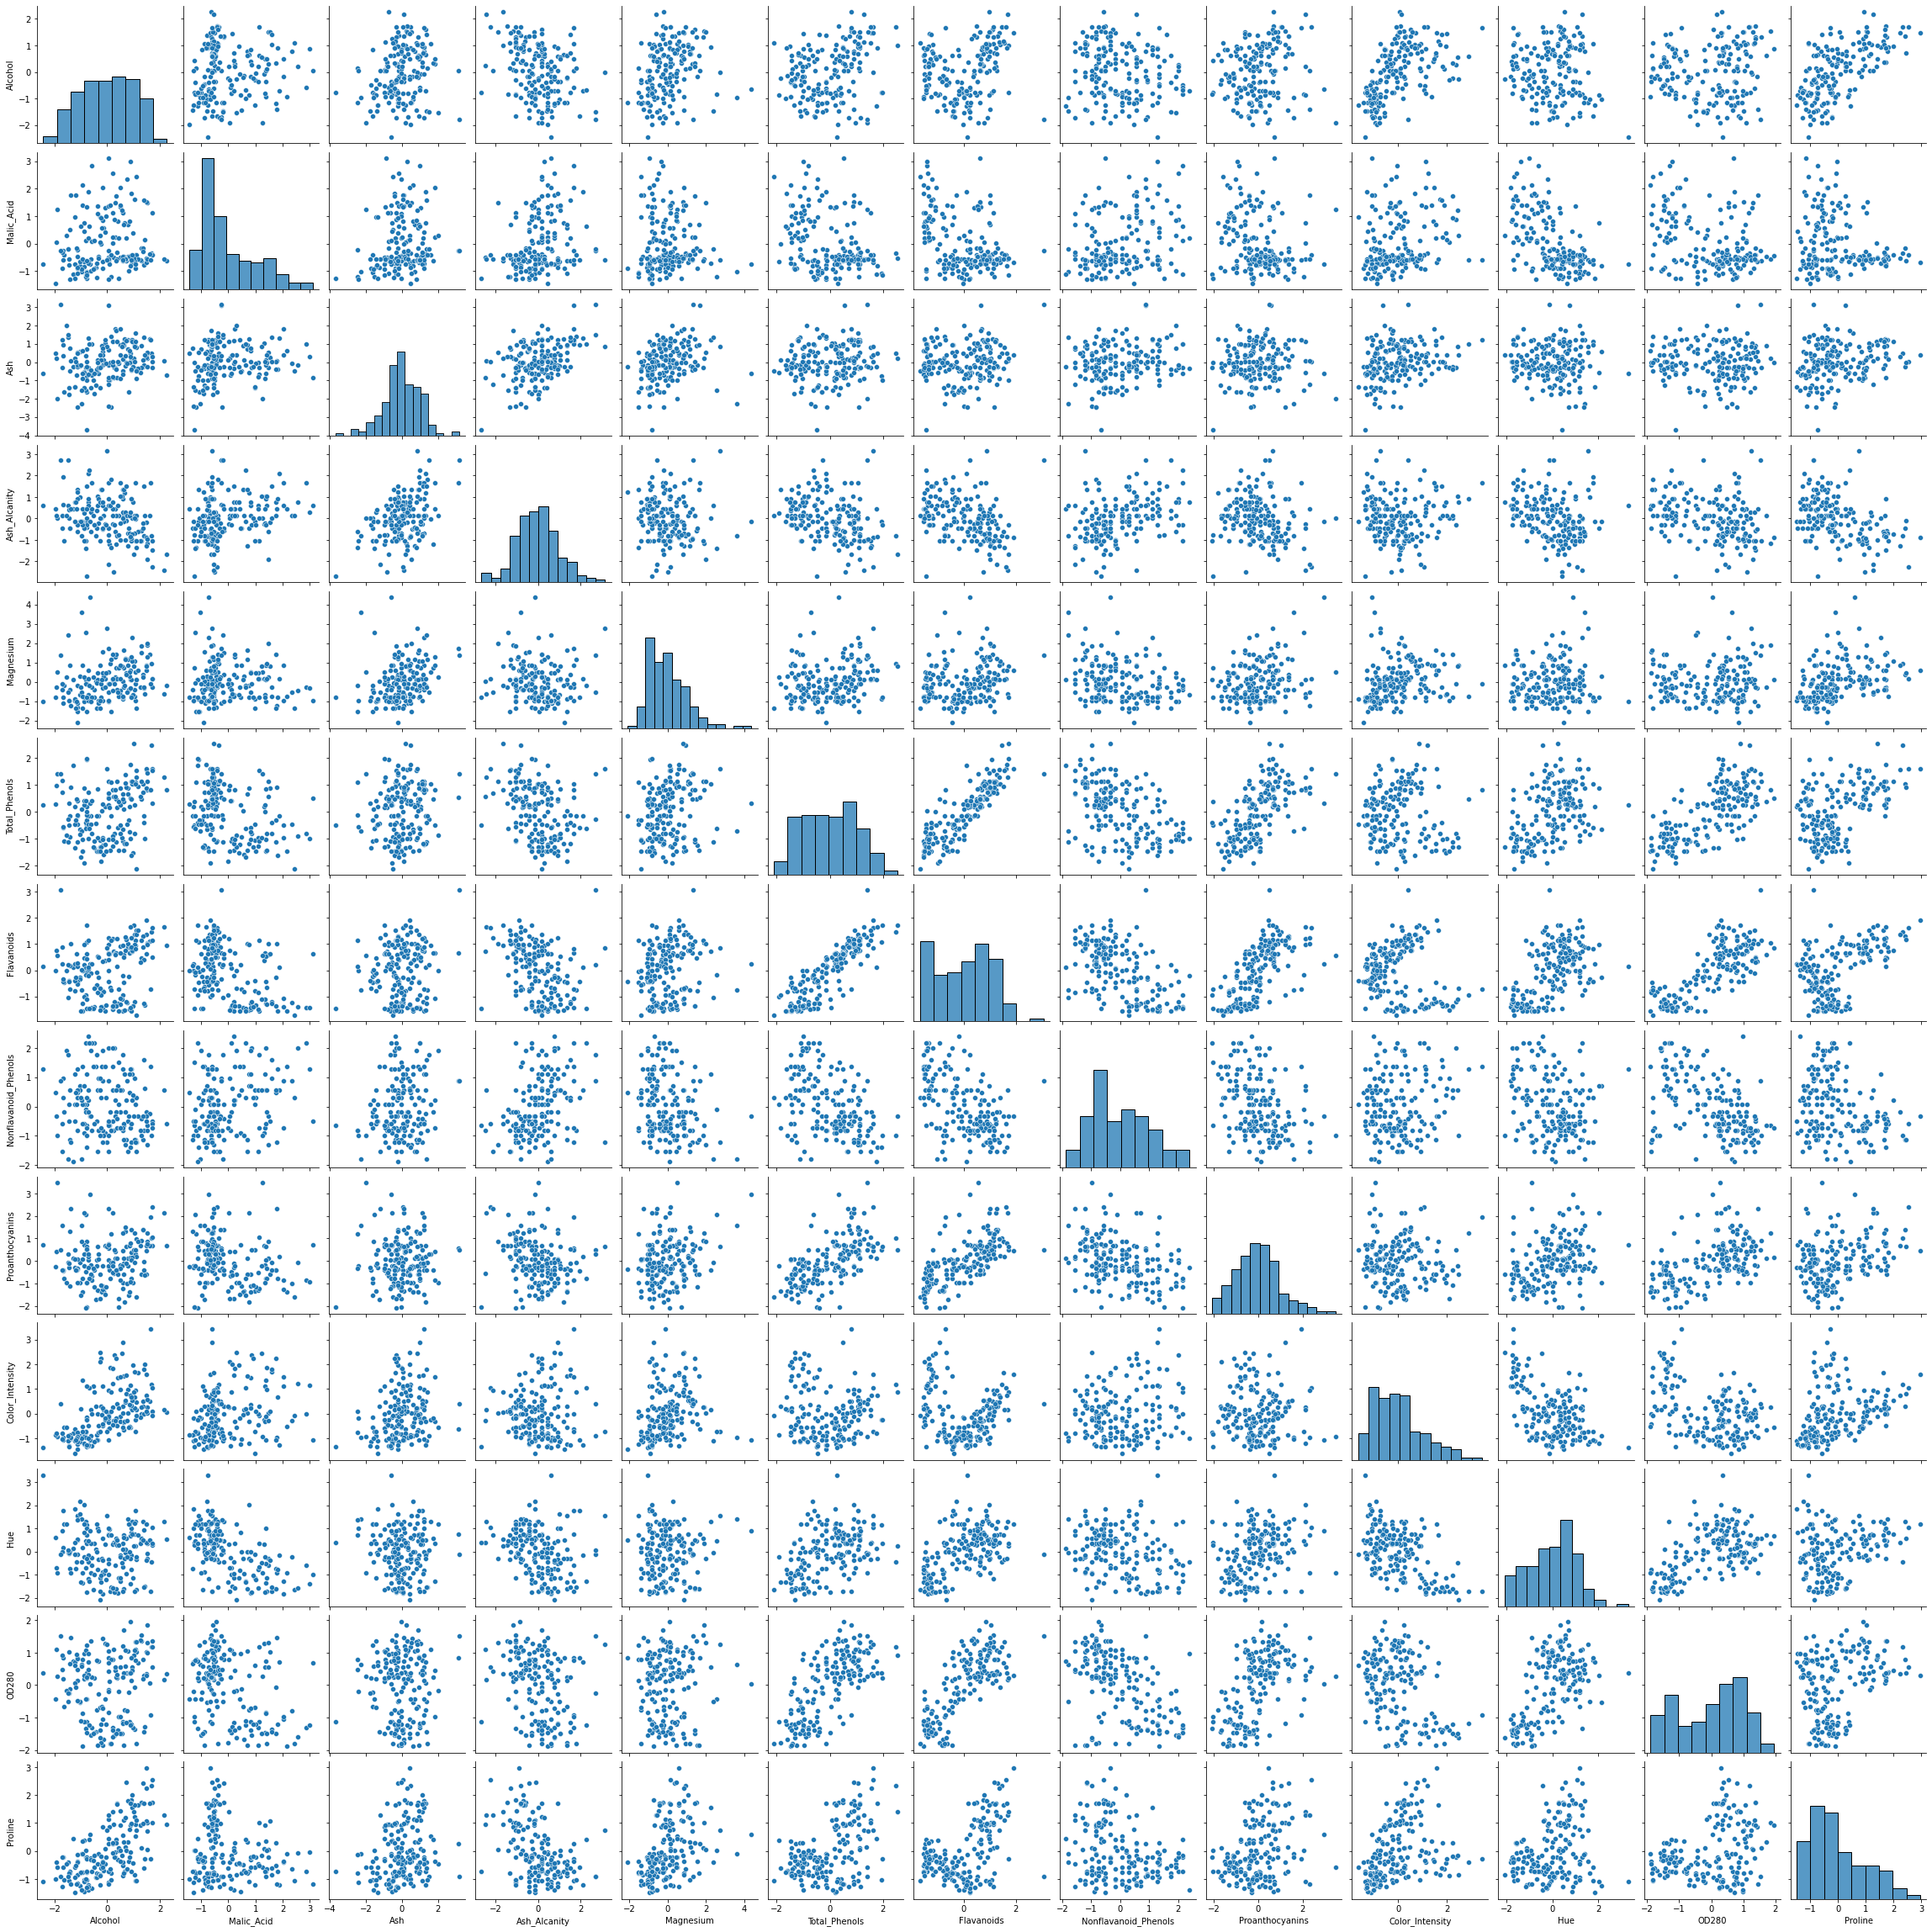

In [42]:
sns.pairplot(df)

In [43]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [44]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,4.366046e-17,5.987720e-17,5.613487e-17,-1.135172e-16,-1.715232e-17,-3.074944e-16,-2.494883e-17,1.085274e-16,1.715232e-17,-1.122697e-17,1.072800e-16,-5.488743e-17,1.790079e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [ ]:
## Scaling already done

In [45]:
### PCA

from sklearn.decomposition import PCA
pc = PCA(n_components=2)
pc_arr = pc.fit_transform(df)


In [46]:
pc_arr.shape

(178, 2)

In [47]:
trans_data = pd.DataFrame(pc_arr, columns = ["PC1","PC2"])

In [48]:
trans_data

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [49]:
trans_data.corr().round(2)

,PC1,PC2
PC1,1.0,-0.0
PC2,-0.0,1.0


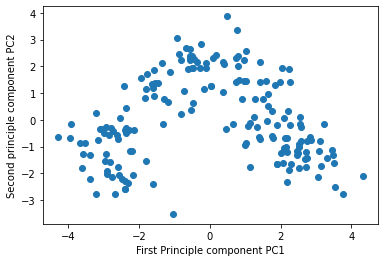

In [50]:
import matplotlib.pyplot as plt
plt.scatter(trans_data['PC1'],trans_data['PC2'])
plt.xlabel("First Principle component PC1")
plt.ylabel("Second principle component PC2")
plt.show()

In [51]:
pc.explained_variance_ratio_ * 100

array([36.1988481 , 19.20749026])

In [52]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(trans_data, method = "ward")

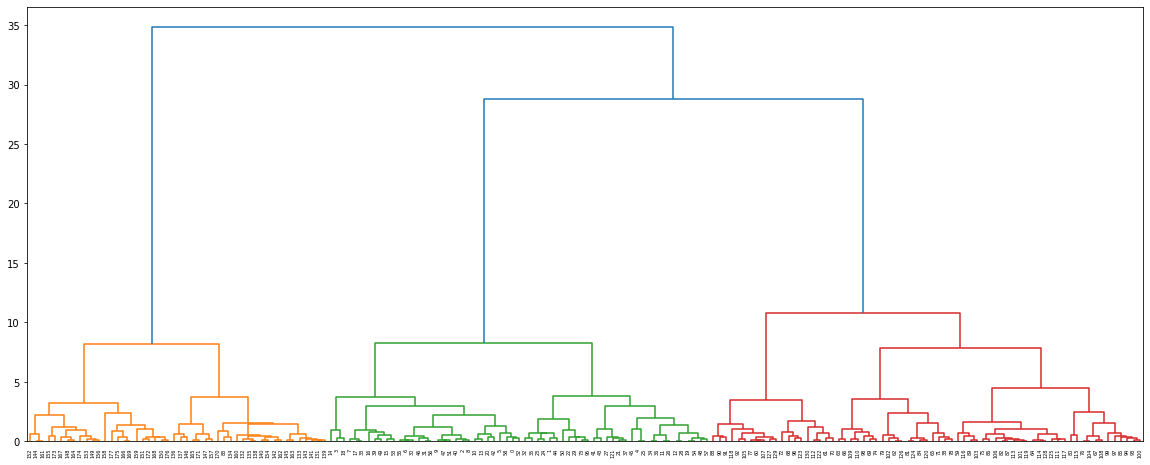

In [53]:
plt.figure(figsize=(20,8))
dendrogram(mergings, labels = df.index, leaf_rotation=90)   ### interc cluster distance matrix
plt.show() 

# KMeans Clustering after PCA

In [54]:
km=KMeans(n_clusters=3,init="k-means++",n_init=10,random_state=101)
y_kmeans = km.fit_predict(trans_data)

In [55]:
sil_avg = silhouette_score(trans_data, y_kmeans)
sil_avg

0.5610505693103246

# Agglomerative HC after PCA

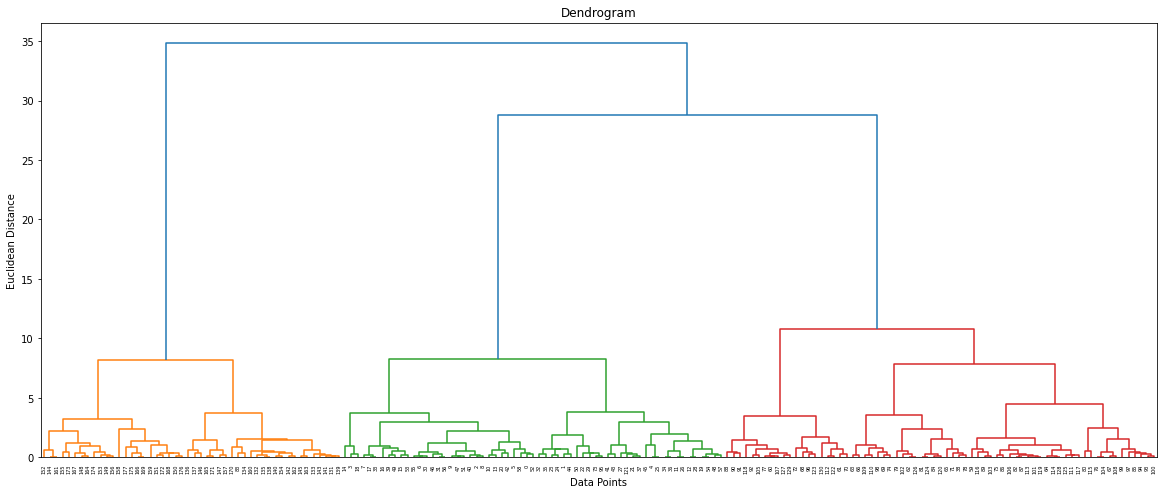

In [56]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(trans_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [57]:
## Agglomerative HC model

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(trans_data)

In [58]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [59]:
# Silhouette score

from sklearn.metrics import silhouette_score
sil_avg = silhouette_score(trans_data, y_hc)
sil_avg

0.5590883962040384

# DBSCAN after PCA

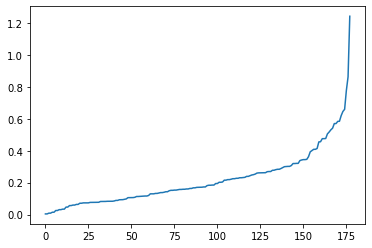

In [70]:
### DBSCAN Clustering with PCA

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(trans_data)
distances, indices = nbrs.kneighbors(trans_data)

## we sort and plot results
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [71]:
### The optimal value for epsilon will be found at the point of maximum curvature

# We train our model, selecting .6 for eps and setting min_samples to 15.
# min_samples >= no of columns + 1


#We train our model, selecting .6 for eps and setting min_samples to 15.

In [73]:
db = DBSCAN(eps=.6, min_samples=15).fit(trans_data)
model = db.fit(trans_data)

#The labels_ property contains the list of clusters and their respective points.
clusters = db.labels_

# Number of clusters in labels, ignoring noise if present.

n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 106


In [74]:
clusters

array([-1, -1,  0, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1,
        0, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0, -1,  0,
       -1,  0, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1,  0,  0,  0,  0, -1,
        0, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1, -1, -1, -1,  0, -1,  1,  1, -1, -1, -1, -1, -1,  1,  2, -1,
       -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  2,  2,  2, -1,  2,
       -1, -1,  2,  2,  2,  2,  2,  2, -1,  2, -1, -1, -1, -1, -1, -1, -1,
       -1,  2, -1, -1, -1, -1, -1,  2,  2,  2,  2, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [75]:
# Silhouette score

sil_avg = silhouette_score(trans_data, clusters)
sil_avg

0.017003870042596684

# Silhouette Scores improved after PCA for KMeans and Agglomerative HC